In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Seed for reproducibility
np.random.seed(42)

# Generate custom data
num_samples = 100
size = np.random.uniform(1000, 3500, num_samples)  # Size in square feet
bedrooms = np.random.randint(1, 6, num_samples)    # Number of bedrooms
age = np.random.randint(1, 50, num_samples)        # Age of the house in years

# Generate house prices with some random noise
price = np.random.uniform(50000, 100000, num_samples)

# Create a DataFrame
data = pd.DataFrame({
    'Size': size,
    'Bedrooms': bedrooms,
    'Age': age,
    'Price': price
})
data.head(100)

,Size,Bedrooms,Age,Price
0,1936.350297,1,25,77638.248342
1,3376.785766,4,23,78614.623459
2,2829.984855,5,31,99016.579186
3,2496.646210,4,30,53767.312800
4,1390.046601,5,42,65284.850964
...,...,...,...,...
95,2234.488991,1,41,67315.216054
96,2306.832073,2,37,73233.690647
97,2068.852546,1,24,82488.684132
98,1063.547817,3,29,52402.946210


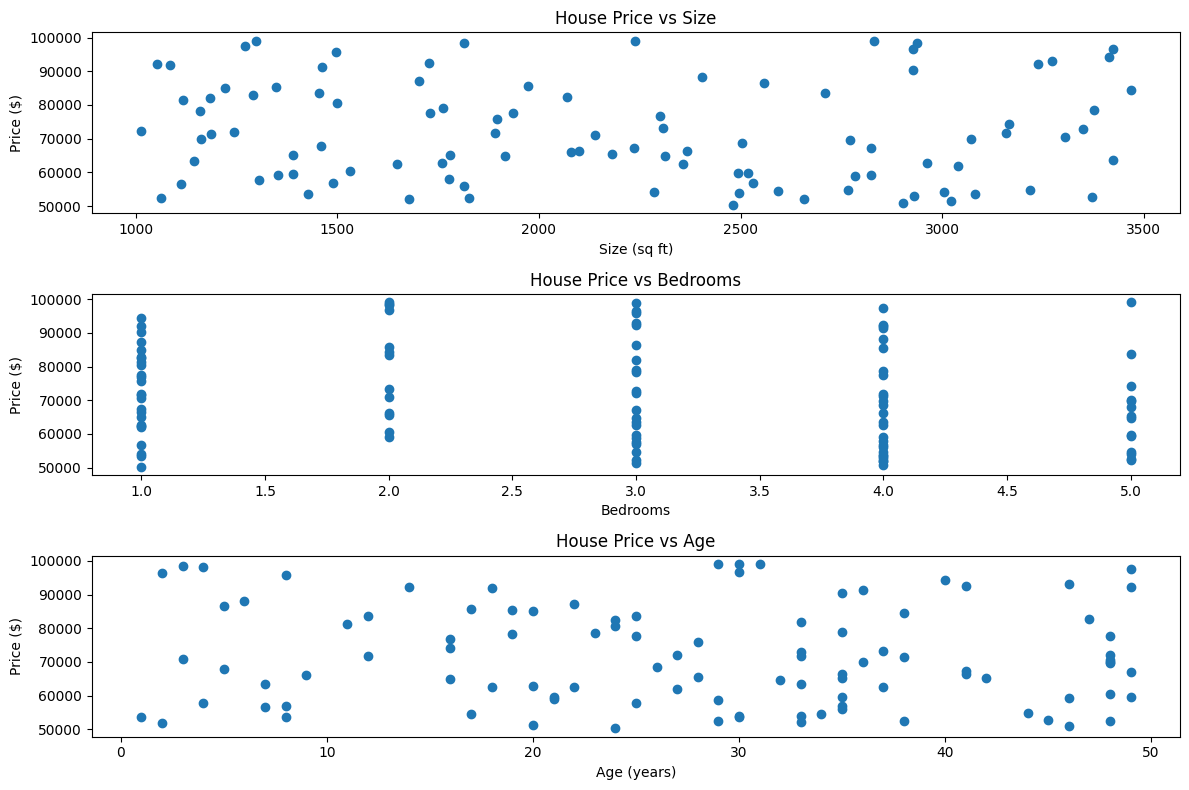

In [8]:
# Visualize the data
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.scatter(data['Size'], data['Price'])
plt.title('House Price vs Size')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($)')

plt.subplot(3, 1, 2)
plt.scatter(data['Bedrooms'], data['Price'])
plt.title('House Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price ($)')

plt.subplot(3, 1, 3)
plt.scatter(data['Age'], data['Price'])
plt.title('House Price vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Split the data
X = data[['Size', 'Bedrooms', 'Age']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficients: [ 1.07857999e+00 -1.98870544e+03 -1.83570326e+02]
Intercept: 80411.50040244684


Mean Squared Error: 258045218.70508415
R^2 Score: -0.12226175119445148


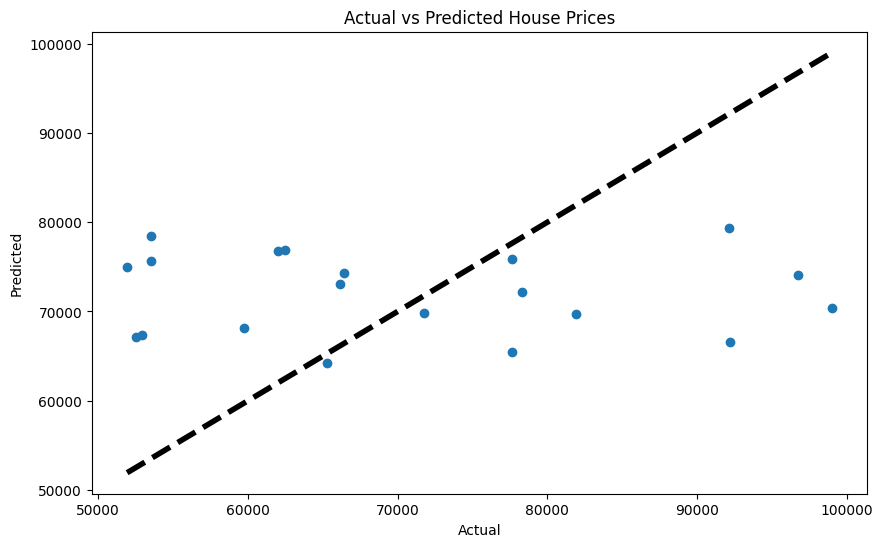

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()